In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("dark") # remove gridline

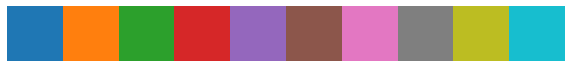

In [27]:
palette = sns.color_palette()
sns.palplot(palette)

# Theoretical estimation

In [121]:
# calculating data
dx = np.linspace(25, 400)
dz = np.linspace(0.02, 0.6)
A = 1
B = 1000
D = 2*A*dx[np.newaxis,:]+B*dz[:,np.newaxis]
D = D/D.max()

In [122]:
D.min(), D.max()

(0.050000000000000003, 1.0)

In [123]:
# convenience plotting functions

color1 = palette[5] # choose line color
color2 = 'white'

def add_scaling_line(ax, dx):
    '''optimal scaling lines'''
    ax.plot(dx, dx/1500, '--', color = color1, label='$\Delta x/\Delta z = 1500$')
    ax.plot(dx, dx/1000, '--', color = color2, label='$\Delta x/\Delta z = 1000$')
    
def add_legend(ax):
    '''set legend box color
    https://stackoverflow.com/questions/19863368/matplotlib-legend-background-color
    '''
    legend = ax.legend(fontsize=13, frameon=1)
    frame = legend.get_frame()
    frame.set_edgecolor('black')
    frame.set_facecolor('w')
    frame.set_alpha(0.4)
    
def add_constraint(ax, dx):

    # dx^3*dx = P, computational resource constraint
    dzz = 0.3e6/dx**3
    for i, level in enumerate([1/32, 1/4, 2, 16]):
        label = '$\Delta z \cdot \Delta x^3=const$' if i==0 else None
        ax.plot(dx, level*dzz, c=color1, label=label)

    # dx^2*dx = P, box number constaint
    dzz = 0.15e4/dx**2
    for i, level in enumerate([1/16, 1/4, 1, 4, 16]):
        label = '$\Delta z \cdot \Delta x^2=const$' if i==0 else None
        ax.plot(dx, level*dzz, c=color2, label=label)
        

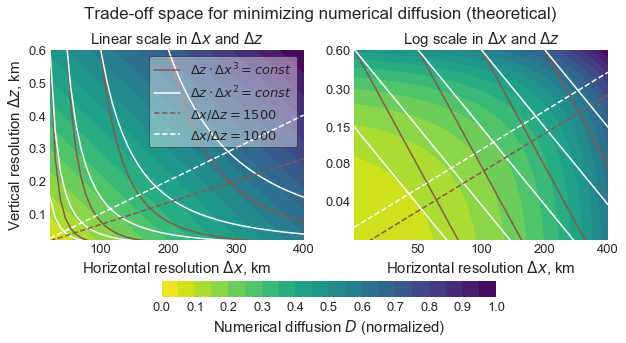

In [137]:
fig, axes = plt.subplots(1, 2, figsize=[10, 5])

titlesize = 15

# == linear scale ==
ax = axes[0]
ax.set_title('Linear scale in $\Delta x$ and $\Delta z$', fontsize=titlesize)

def add_contour(ax, dx, dz, D):
    im = ax.contourf(dx, dz, D, 
                 levels=np.linspace(0, D.max(), 21),
                 cmap='viridis_r')
    ax.set_xlim([dx.min(),dx.max()])
    ax.set_ylim([dz.min(),dz.max()]) 
    
    # make label fonts larger
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)
    return im

ax.set_xlabel('Horizontal resolution $\Delta x$, km', fontsize=15)
ax.set_ylabel('Vertical resolution $\Delta z$, km', fontsize=15)

im = add_contour(ax, dx, dz, D)
add_constraint(ax, dx)
add_scaling_line(ax, dx)

add_legend(ax)

# == log scale ==
ax = axes[1]
ax.set_title('Log scale in $\Delta x$ and $\Delta z$', fontsize=titlesize)

add_contour(ax, dx, dz, D)

ax.set_xlabel('Horizontal resolution $\Delta x$, km', fontsize=15)

add_constraint(ax, dx)
add_scaling_line(ax, dx)

# switch to log scale
ax.set_xscale('log');ax.set_yscale('log')

# fix tick labels
# https://stackoverflow.com/questions/21920233/matplotlib-log-scale-tick-label-number-formatting
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set_yticks([0.04, 0.08, 0.15, 0.3 , 0.6])
ax.set_xticks([50, 100, 200, 400])

# == common colorbar ===
cb = fig.colorbar(im, ax=axes.tolist(), shrink=0.6,
                  orientation='horizontal',
                  ticks=np.linspace(0, D.max(), 11))
cb.set_label('Numerical diffusion $D$ (normalized)', fontsize=15)
cb.ax.tick_params(labelsize=13)
 
# === common title ===
fig.suptitle('Trade-off space for minimizing numerical diffusion (theoretical)', 
             fontsize = titlesize+2, y = 1.00)

fig.savefig('scaling_theory.png', dpi=300)


# Numerical experiment